In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV files
df = pd.read_csv('tested.csv')

# Display the first 5 rows of each DataFrame
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types for each DataFrame
print(df.info())

| PassengerId   | Survived   | Pclass   | Name                                         | Sex    | Age   | SibSp   | Parch   | Ticket   | Fare    | Cabin   | Embarked   |
|:--------------|:-----------|:---------|:---------------------------------------------|:-------|:------|:--------|:--------|:---------|:--------|:--------|:-----------|
| 892           | 0          | 3        | Kelly, Mr. James                             | male   | 34.5  | 0       | 0       | 330911   | 7.8292  | nan     | Q          |
| 893           | 1          | 3        | Wilkes, Mrs. James (Ellen Needs)             | female | 47    | 1       | 0       | 363272   | 7       | nan     | S          |
| 894           | 0          | 2        | Myles, Mr. Thomas Francis                    | male   | 62    | 0       | 0       | 240276   | 9.6875  | nan     | Q          |
| 895           | 0          | 3        | Wirz, Mr. Albert                             | male   | 27    | 0       | 0       | 315154   | 8.6625  | nan

handling the missing values. Then, I'll encode the categorical columns and scale the numerical features.

In [4]:
from sklearn.preprocessing import StandardScaler

# Impute missing Age with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing Fare with the median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Handle missing Cabin - create a binary feature indicating if Cabin info is available
df['Cabin_Known'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
df.drop('Cabin', axis=1, inplace=True)

# Handle missing Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# One-Hot Encode 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Consider 'Pclass' as categorical and one-hot encode it
df['Pclass'] = df['Pclass'].astype(str)
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)

# Scale numerical features
numerical_features = ['Age', 'Fare']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the first 5 rows of the dataframe
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column name and their data types
print(df.info())

| PassengerId   | Survived   | Name                                         | Age       | SibSp   | Parch   | Ticket   | Fare      | Cabin_Known   | Sex_male   | Embarked_Q   | Embarked_S   | Pclass_2   | Pclass_3   |
|:--------------|:-----------|:---------------------------------------------|:----------|:--------|:--------|:---------|:----------|:--------------|:-----------|:-------------|:-------------|:-----------|:-----------|
| 892           | 0          | Kelly, Mr. James                             | 0.386231  | 0       | 0       | 330911   | -0.497413 | 0             | True       | True         | False        | False      | True       |
| 893           | 1          | Wilkes, Mrs. James (Ellen Needs)             | 1.37137   | 1       | 0       | 363272   | -0.512278 | 0             | False      | False        | True         | False      | True       |
| 894           | 0          | Myles, Mr. Thomas Francis                    | 2.55354   | 0       | 0       | 240276   | -0.4641

C:\Users\User\AppData\Local\Temp\ipykernel_18416\2658749795.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18416\2658749795.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

drop the unnecessary columns and split the data into training and validation sets.

In [5]:
# Drop the Name, Ticket and PassengerId columns
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

# Separate features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shape of the training and validation sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (334, 10)
X_val shape: (84, 10)
y_train shape: (334,)
y_val shape: (84,)


In [ ]:
train a Logistic Regression model and evaluate its performance on the validation set.

--- Logistic Regression Validation Metrics ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC AUC Score: 1.0000
Confusion Matrix:
[[53  0]
 [ 0 31]]


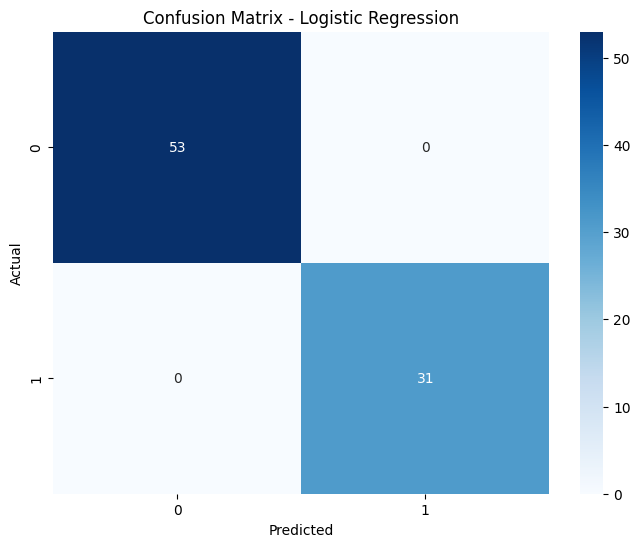

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the validation set
logistic_predictions_val = logistic_model.predict(X_val)

# Evaluate performance on the validation set
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"--- {model_name} Validation Metrics ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model(y_val, logistic_predictions_val, "Logistic Regression")

The Logistic Regression model achieved perfect scores across all metrics on the validation set, indicating excellent predictive performance.